In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\used_car_price_prediction\data\vehicles.csv")

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [6]:
df.shape

(426880, 26)

In [7]:
processed_df = df[['year', 'manufacturer', 'condition', 'cylinders',
    'fuel', 'odometer', 'title_status', 'transmission',
    'drive', 'size', 'type','price']].copy()

In [8]:
processed_df.to_csv(r"D:\used_car_price_prediction\data\processed_vehicles.csv", index=False)

In [9]:
processed_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11900
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900


In [10]:
processed_df.isna().sum()

year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
price                0
dtype: int64

In [11]:
(processed_df.isna().sum() / len(processed_df)) * 100


year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
price            0.000000
dtype: float64

In [12]:
processed_df['year'] = processed_df['year'].fillna(processed_df['year'].mode()[0])

In [13]:
processed_df['year'] = processed_df['year'].astype(int)

In [14]:
processed_df['year'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: int64

In [15]:
processed_df['manufacturer'].value_counts().head(10)

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

In [16]:
import numpy as np

In [17]:
processed_df.replace("NaN", np.nan, inplace=True)

In [18]:
processed_df.dropna(subset=['manufacturer'], inplace=True)

In [19]:
processed_df['manufacturer'].isna().sum()

np.int64(0)

In [20]:
processed_df['condition']=processed_df['condition'].fillna('unknown')


In [21]:
processed_df['condition'].value_counts().head(10)

condition
unknown      167283
good         116215
excellent     97631
like new      20212
fair           6170
new            1172
salvage         551
Name: count, dtype: int64

In [22]:
processed_df['cylinders'] = processed_df.groupby('manufacturer')['cylinders'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna('unknown')
)
processed_df['cylinders'].value_counts()

cylinders
6 cylinders     139645
8 cylinders     133751
4 cylinders     128453
5 cylinders       3494
other             1838
10 cylinders      1364
3 cylinders        559
12 cylinders       130
Name: count, dtype: int64

In [23]:
processed_df.dropna(subset=['fuel'], inplace=True)

In [24]:
processed_df.dropna(subset=['odometer'], inplace=True)

In [25]:
processed_df['title_status'].fillna('unknown', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9596\3836192547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['title_status'].fillna('unknown', inplace=True)


In [26]:
processed_df.isna().sum()

year                 0
manufacturer         0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission      1556
drive           121393
size            288560
type             85206
price                0
dtype: int64

In [27]:
processed_df['transmission'].value_counts().head(10)

transmission
automatic    319339
other         60130
manual        22049
Name: count, dtype: int64

In [28]:
processed_df['transmission'] = processed_df.groupby(['manufacturer', 'year'])['transmission'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna('unknown')
)


In [29]:
processed_df['drive'].fillna('unknown', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9596\4286841257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['drive'].fillna('unknown', inplace=True)


In [30]:
processed_df['size'].fillna('unknown', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9596\4125094259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['size'].fillna('unknown', inplace=True)


In [31]:
processed_df['type'].fillna('unknown', inplace=True)    

C:\Users\PC\AppData\Local\Temp\ipykernel_9596\2557709225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['type'].fillna('unknown', inplace=True)


# EDA

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

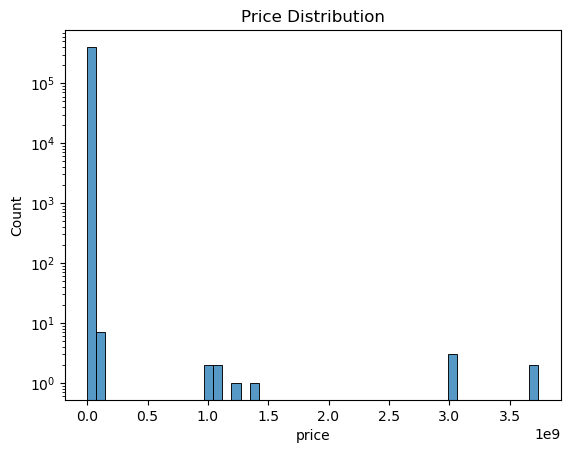

In [33]:
sns.histplot(processed_df['price'], bins=50)
plt.yscale('log')
plt.title('Price Distribution')
plt.show()


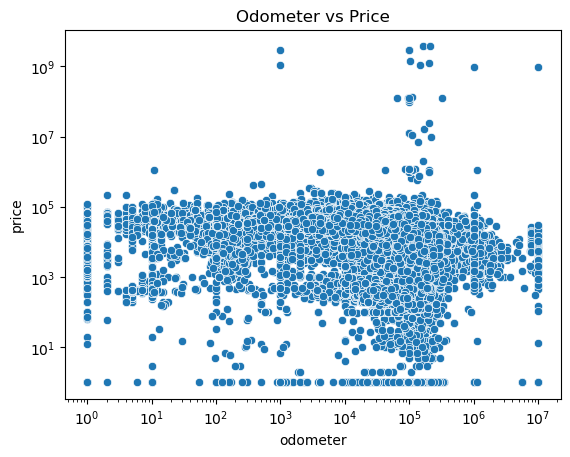

In [42]:
sns.scatterplot(x='odometer', y='price', data=processed_df)
plt.yscale('log')
plt.xscale('log')
plt.title('Odometer vs Price')
plt.show()

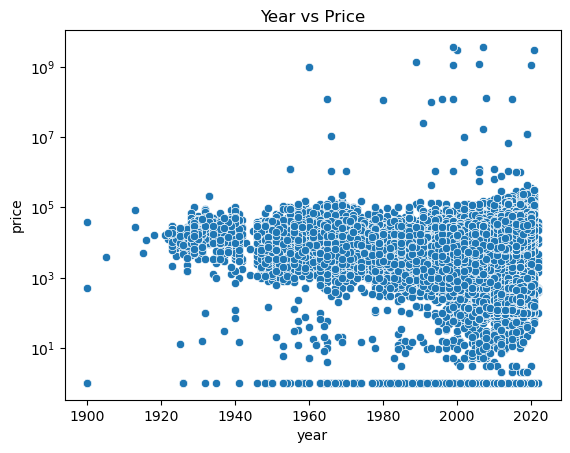

In [43]:
sns.scatterplot(x='year', y='price', data=processed_df)
plt.yscale('log')
plt.title('Year vs Price')
plt.show()

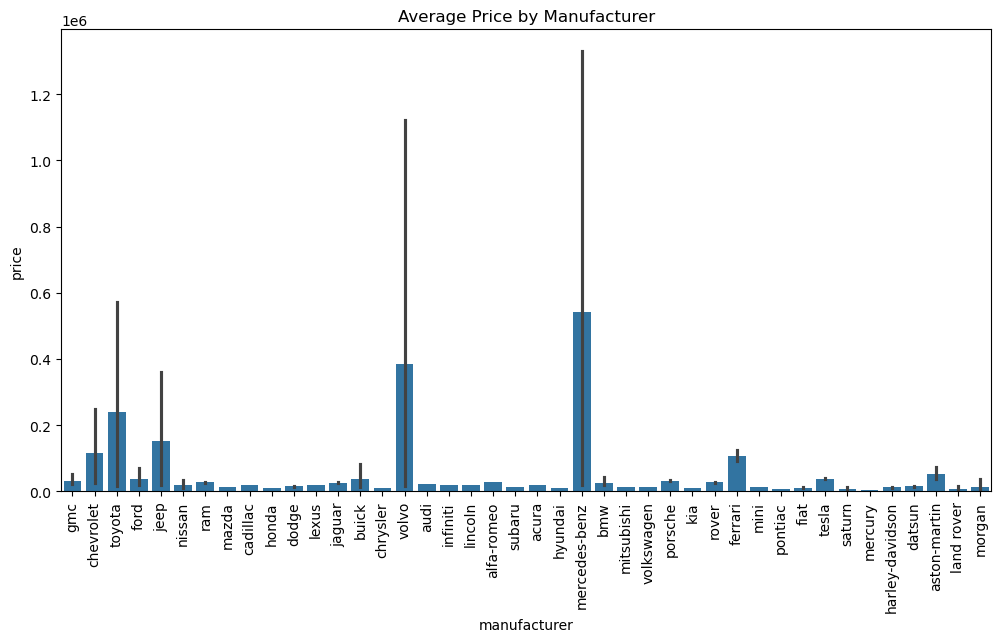

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x='manufacturer', y='price', data=processed_df)
plt.xticks(rotation=90)
# plt.yscale('log')
plt.title('Average Price by Manufacturer')
plt.show()

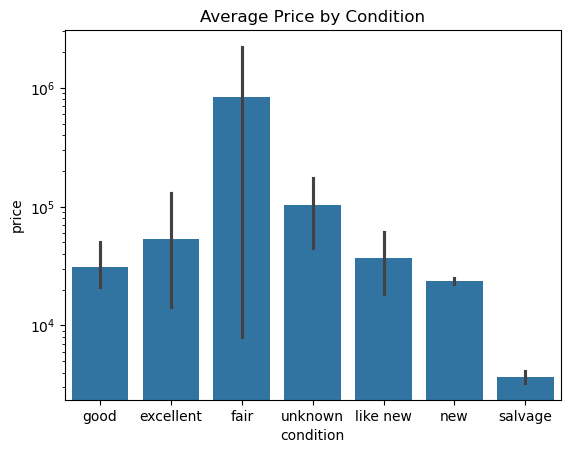

In [45]:
sns.barplot(x='condition', y='price', data=processed_df)
plt.yscale('log')
plt.title('Average Price by Condition')
plt.show()

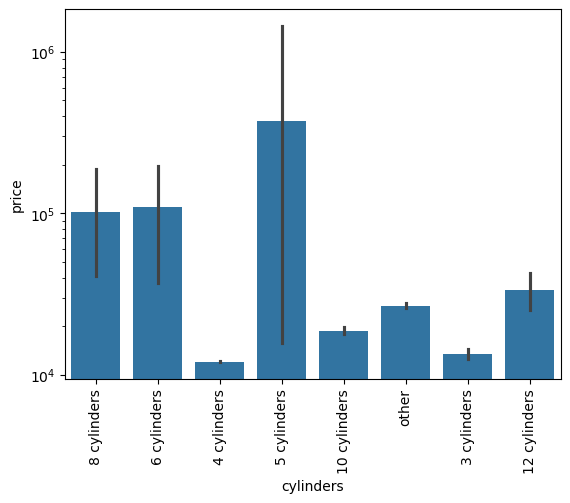

In [38]:
sns.barplot(x='cylinders', y='price', data=processed_df)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

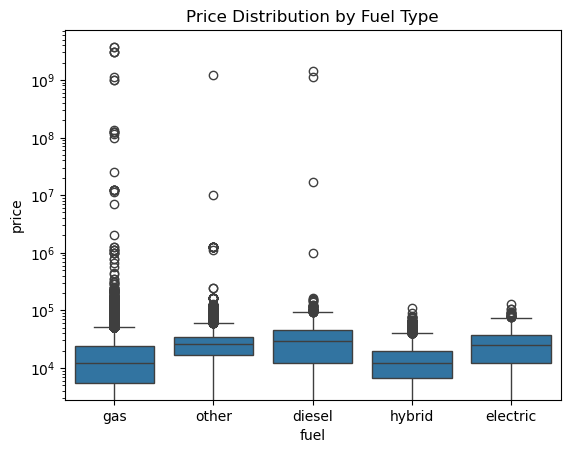

In [46]:
sns.boxplot(x='fuel', y='price', data=processed_df)
plt.yscale('log')
plt.title('Price Distribution by Fuel Type')
plt.show()

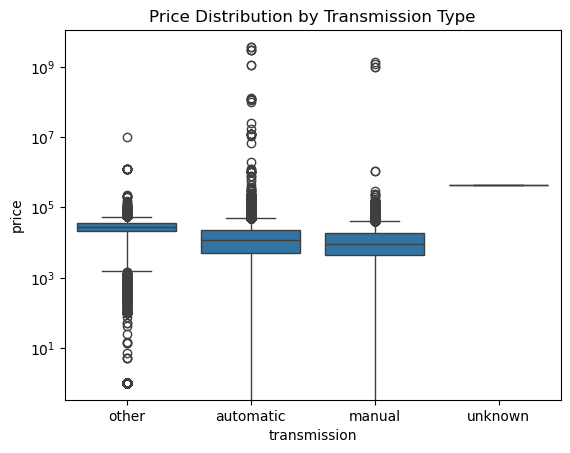

In [47]:
sns.boxplot(x='transmission', y='price', data=processed_df)
plt.yscale('log')
plt.title('Price Distribution by Transmission Type')
plt.show()

Text(0.5, 1.0, 'Average Price by Transmission Type')

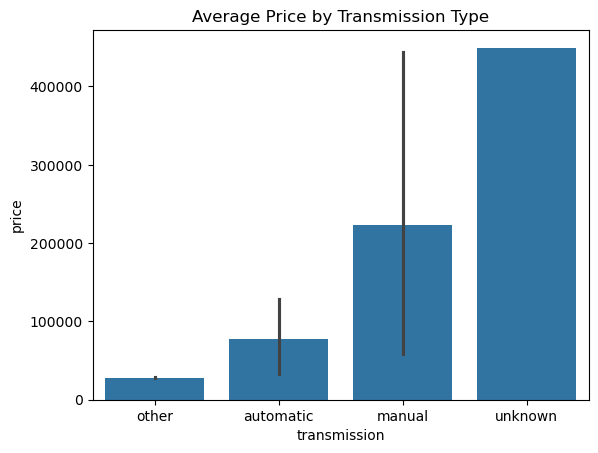

In [48]:
sns.barplot(x='transmission', y='price', data=processed_df)
plt.title('Average Price by Transmission Type')


In [49]:
print(processed_df['price'].corr(processed_df['odometer']))


0.0108724362529078


In [50]:
print(processed_df['price'].corr(processed_df['year']))

-0.0054967506404611875


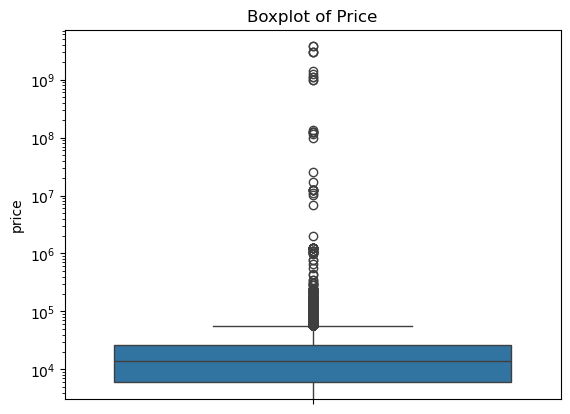

In [51]:
sns.boxplot(y=processed_df['price'])
plt.yscale('log')
plt.title('Boxplot of Price')
plt.show()

# Feature Engineering

In [52]:
from datetime import datetime
current_year = datetime.now().year
processed_df['car_age'] = current_year - processed_df['year']

In [53]:
processed_df[['year','car_age']].head()

,year,car_age
27,2014,11
28,2010,15
29,2020,5
30,2017,8
31,2013,12


In [54]:
processed_df.columns

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type', 'price',
       'car_age'],
      dtype='object')

# Encoding

In [55]:
processed_df = pd.get_dummies(processed_df, columns=['manufacturer', 'condition', 'cylinders',
    'fuel', 'title_status', 'transmission',
    'drive', 'size', 'type'], drop_first=True)

In [56]:
processed_df.head()

,year,odometer,price,car_age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon
27,2014,57923.0,33590,11,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28,2010,71229.0,22590,15,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
29,2020,19160.0,39590,5,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
30,2017,41124.0,30990,8,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
31,2013,128000.0,15000,12,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [57]:
processed_df = processed_df.astype(int)

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler()
numerical_features = ['odometer', 'car_age']
processed_df[numerical_features] = scaler_features.fit_transform(processed_df[numerical_features])

In [103]:
scaler_target = MinMaxScaler()
processed_df['normalized_price'] = scaler_target.fit_transform(processed_df[['price']])

In [115]:
import joblib
joblib.dump(scaler_features, 'scaler_features.pkl')

['scaler_features.pkl']

In [104]:
joblib.dump(scaler_target, 'scaler_target.pkl')

['scaler_target.pkl']

In [101]:
processed_df.drop(columns=['normalized_price'], inplace=True)

In [64]:
joblib.dump(processed_df.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']

In [ ]:
from sklearn.model_selection import train_test_split
X = processed_df.drop(columns=['price', 'normalized_price'])
y = processed_df['normalized_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Evaluation

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
prediction_LR = model.predict(X_test)

In [55]:
prediction_LR = scaler.inverse_transform(prediction_LR.reshape(-1, 1))


In [76]:
print("The root mean squared error (MSE) is: ", root_mean_squared_error(y_test, prediction_LR))

The root mean squared error (MSE) is:  10274.509186643707


capping(limiting the influenec of extreme values) the outliers from the dataset as it is causing the model to effect 

In [99]:
lower_cap = processed_df['price'].quantile(0.05)
upper_cap = processed_df['price'].quantile(0.95)

In [100]:
processed_df['price'] = processed_df['price'].clip(lower=lower_cap, upper=upper_cap)

In [61]:
print(processed_df['price'].describe())

count    403074.000000
mean      16784.160690
std       13082.073492
min           0.000000
25%        5995.000000
50%       13995.000000
75%       26500.000000
max       43990.000000
Name: price, dtype: float64


In [73]:
processed_df['price'].head()

27    33590
28    22590
29    39590
30    30990
31    15000
Name: price, dtype: int64

In [74]:
processed_df.drop(columns=['normalized_price'],inplace=True)

In [80]:
processed_df['normalized_price'] = scaler.fit_transform(processed_df[['price']])

In [81]:
print(processed_df['normalized_price'].describe())

count    403074.000000
mean          0.381545
std           0.297387
min           0.000000
25%           0.136281
50%           0.318140
75%           0.602410
max           1.000000
Name: normalized_price, dtype: float64


In [105]:
X = processed_df.drop(columns=['normalized_price','price'])
y = processed_df['normalized_price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [107]:
model.fit(X_train, y_train)

LinearRegression()

In [108]:
prediction_LR = model.predict(X_test)

In [109]:
y_test = y_test.values  
y_test = y_test.reshape(-1, 1)  


y_test_inv = scaler.inverse_transform(y_test)

In [111]:
from sklearn.metrics import root_mean_squared_error

In [112]:
print("the root mean squared error (RMSE) is: ", root_mean_squared_error(y_test, prediction_LR))

the root mean squared error (RMSE) is:  0.23356465529992518


In [90]:
print("The  mean squared error (MSE) is: ", mean_squared_error(y_test, prediction_LR))

The  mean squared error (MSE) is:  0.05455244820537287


In [91]:
processed_df['price'].mean()

np.float64(16784.160690096607)

In [113]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']